# 1. Penyiapan data dan clustering k-means untuk segmentasi customer mall serta pemeriksaan kualitas cluster menggunakan elbow method dan koefisien Silhouette

Oleh: Vinka Reviansa (2101918) dan Faiza Latifah (2103319)

# **K-Means Clustering**

##**1. Import Library**

In [ ]:
from google.colab import drive
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_score
#Import library k-Means
from sklearn.cluster import KMeans
#Import library clustering
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

## **2. Eksplorasi Data**

In [ ]:
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Machine Learning/Unsupervised Learning/K-MEANS/Copy of Mall_Customers.csv")

In [ ]:
print(df.columns)

Index(['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')


In [ ]:
df = df.rename(columns={'Genre': 'gender'})

In [ ]:
df = df.rename(columns={'Annual Income (k$)': 'income'})

In [ ]:
df = df.rename(columns={'Spending Score (1-100)': 'spending'})

In [ ]:
df['gender'] = df['gender'].map({'Male': 0, 'Female': 1})
df.head()

,CustomerID,gender,Age,income,spending
0,1,0,19,15,39
1,2,0,21,15,81
2,3,1,20,16,6
3,4,1,23,16,77
4,5,1,31,17,40


In [ ]:
# Pilih fitur-fitur (4 atribut) yang akan dikelompokkan (tidak mengikutsertakan atribut CustomerID)
data_mall_4kol = df[['gender', 'Age',	'income', 'spending']]

In [ ]:
# let's look through our data
data_mall_4kol.head()
# display shape of data
print("Shape:",data_mall_4kol.shape)
# check for any null value
data_mall_4kol.isna().sum()

Shape: (200, 4)


gender      0
Age         0
income      0
spending    0
dtype: int64

In [ ]:
# get information about data
data_mall_4kol.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   gender    200 non-null    int64
 1   Age       200 non-null    int64
 2   income    200 non-null    int64
 3   spending  200 non-null    int64
dtypes: int64(4)
memory usage: 6.4 KB


<ipython-input-12-eb6234c90d4d>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['income'])


Text(0, 0.5, 'Count')

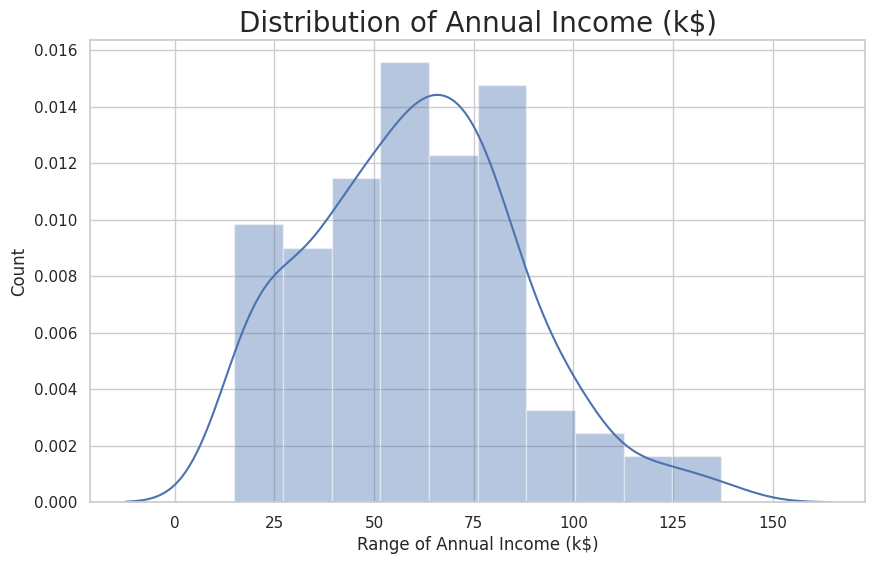

In [ ]:
#Distribution of Annnual Income
plt.figure(figsize=(10, 6))
sns.set(style = 'whitegrid')
sns.distplot(df['income'])
plt.title('Distribution of Annual Income (k$)', fontsize = 20)
plt.xlabel('Range of Annual Income (k$)')
plt.ylabel('Count')

<ipython-input-13-0226dc08e623>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Age'])


Text(0, 0.5, 'Count')

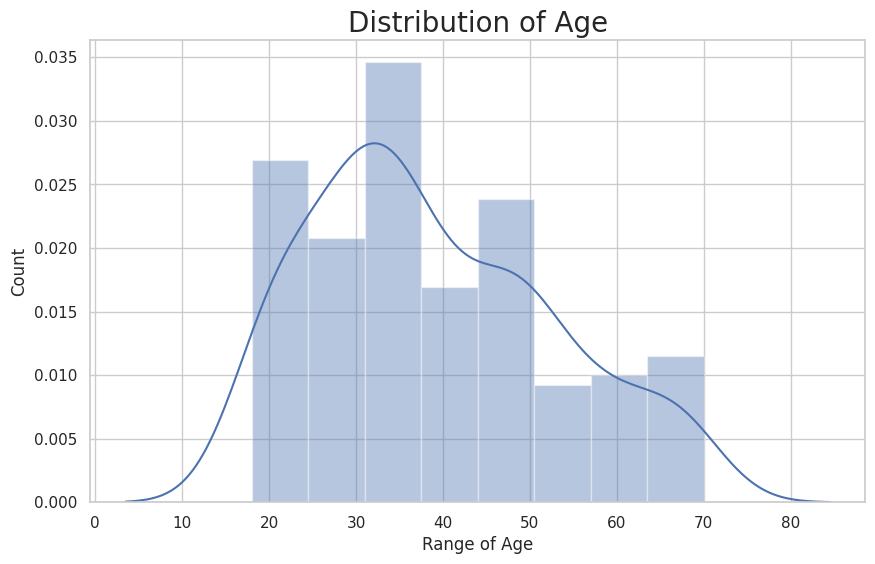

In [ ]:
#Distribution of Age
plt.figure(figsize=(10, 6))
sns.set(style = 'whitegrid')
sns.distplot(df['Age'])
plt.title('Distribution of Age', fontsize = 20)
plt.xlabel('Range of Age')
plt.ylabel('Count')

<ipython-input-14-b9197ad84ccd>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['spending'])


Text(0, 0.5, 'Count')

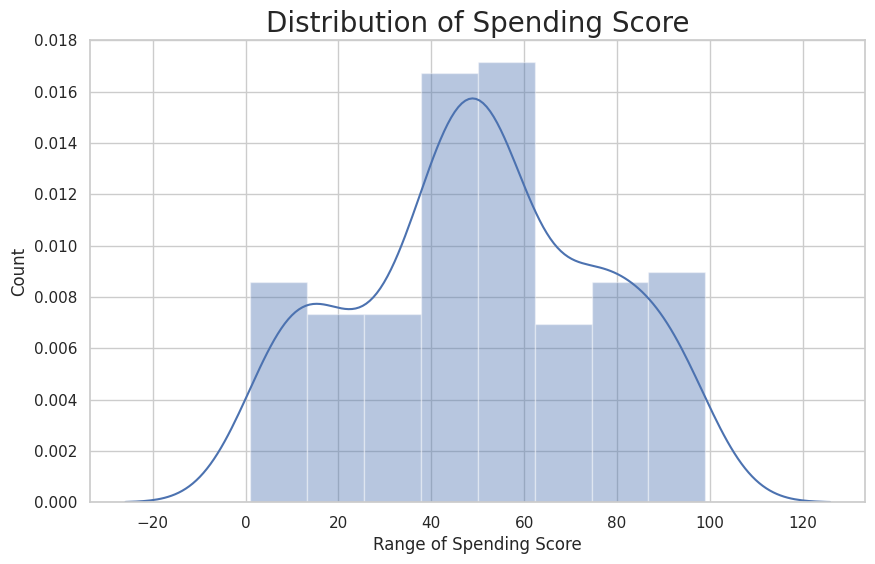

In [ ]:
#Distribution of Spending Score
plt.figure(figsize=(10, 6))
sns.set(style = 'whitegrid')
sns.distplot(df['spending'])
plt.title('Distribution of Spending Score', fontsize = 20)
plt.xlabel('Range of Spending Score')
plt.ylabel('Count')

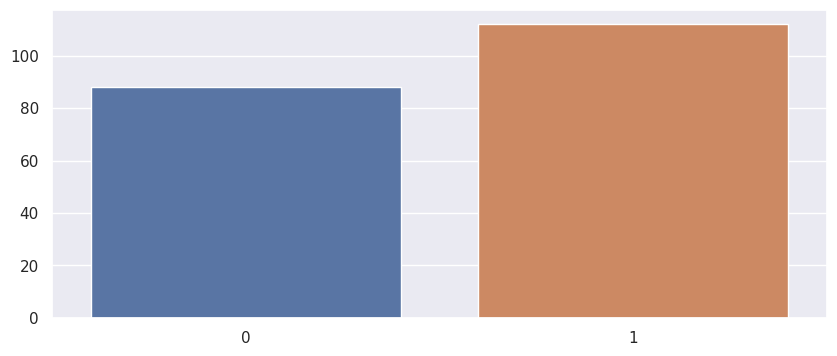

In [ ]:
gender= df.gender.value_counts()
sns.set_style("darkgrid")
plt.figure(figsize=(10,4))
sns.barplot(x=gender.index, y=gender.values)
plt.show()

In [ ]:
# Buat numpy array X dari dataframe data_mall_4kol
x = np.array(data_mall_4kol.values)
x

array([[  0,  19,  15,  39],
       [  0,  21,  15,  81],
       [  1,  20,  16,   6],
       [  1,  23,  16,  77],
       [  1,  31,  17,  40],
       [  1,  22,  17,  76],
       [  1,  35,  18,   6],
       [  1,  23,  18,  94],
       [  0,  64,  19,   3],
       [  1,  30,  19,  72],
       [  0,  67,  19,  14],
       [  1,  35,  19,  99],
       [  1,  58,  20,  15],
       [  1,  24,  20,  77],
       [  0,  37,  20,  13],
       [  0,  22,  20,  79],
       [  1,  35,  21,  35],
       [  0,  20,  21,  66],
       [  0,  52,  23,  29],
       [  1,  35,  23,  98],
       [  0,  35,  24,  35],
       [  0,  25,  24,  73],
       [  1,  46,  25,   5],
       [  0,  31,  25,  73],
       [  1,  54,  28,  14],
       [  0,  29,  28,  82],
       [  1,  45,  28,  32],
       [  0,  35,  28,  61],
       [  1,  40,  29,  31],
       [  1,  23,  29,  87],
       [  0,  60,  30,   4],
       [  1,  21,  30,  73],
       [  0,  53,  33,   4],
       [  0,  18,  33,  92],
       [  1,  

## **3. Pemilihan Atribut sebagai Fitur Dataset**

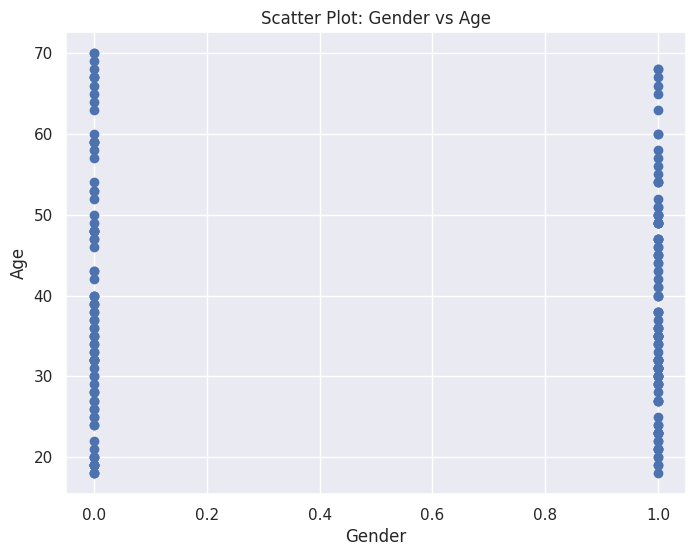

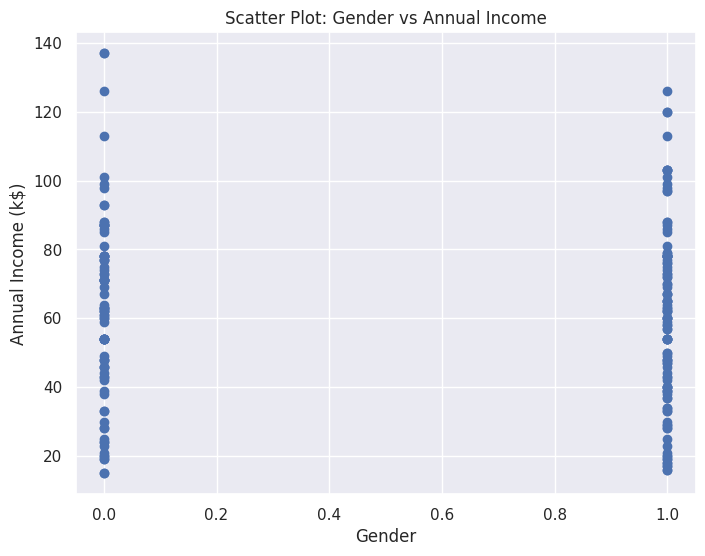

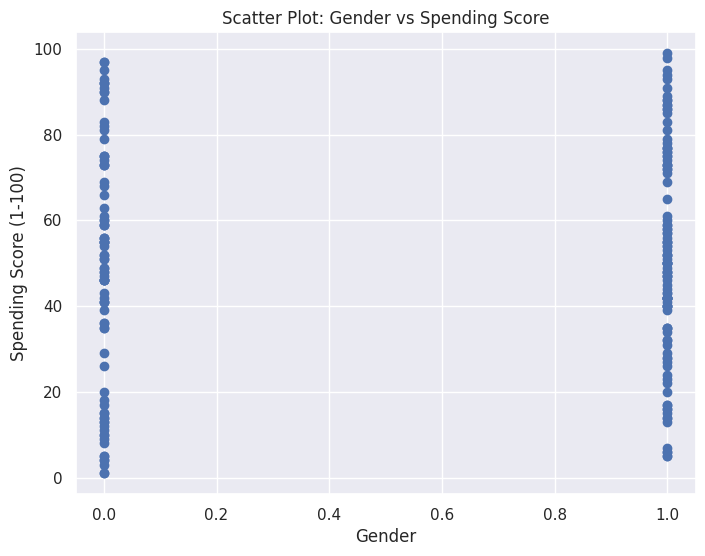

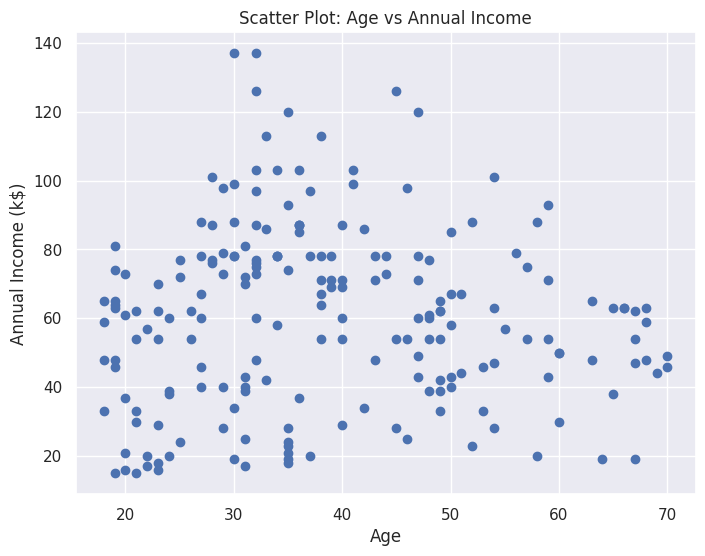

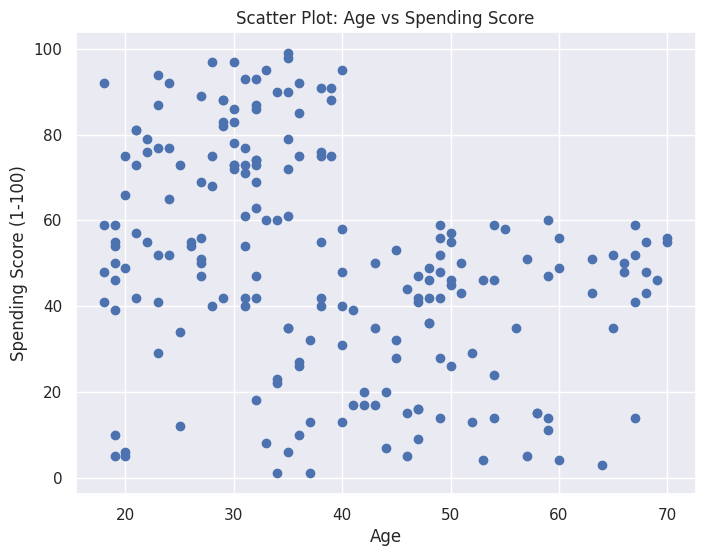

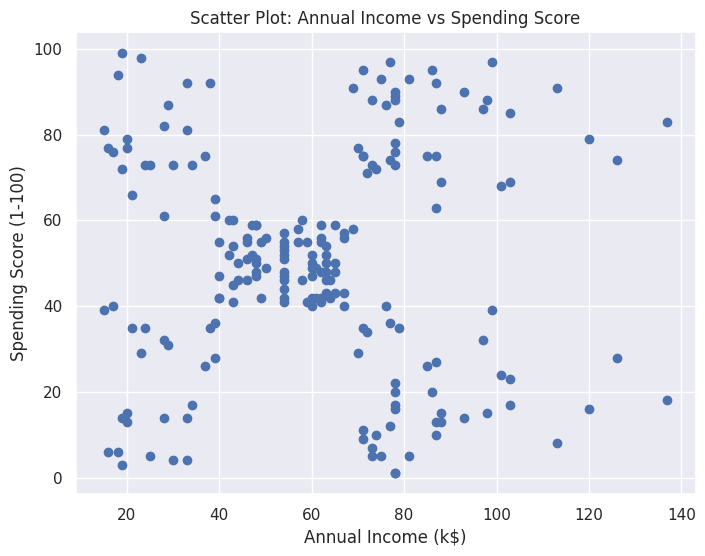

In [ ]:
# Scatter plot gender vs age
plt.figure(figsize=(8, 6))
plt.scatter(data_mall_4kol['gender'], data_mall_4kol['Age'])
plt.title('Scatter Plot: Gender vs Age')
plt.xlabel('Gender')
plt.ylabel('Age')
plt.show()

# Scatter plot gender vs income
plt.figure(figsize=(8, 6))
plt.scatter(data_mall_4kol['gender'], data_mall_4kol['income'])
plt.title('Scatter Plot: Gender vs Annual Income')
plt.xlabel('Gender')
plt.ylabel('Annual Income (k$)')
plt.show()

# Scatter plot gender vs spending
plt.figure(figsize=(8, 6))
plt.scatter(data_mall_4kol['gender'], data_mall_4kol['spending'])
plt.title('Scatter Plot: Gender vs Spending Score')
plt.xlabel('Gender')
plt.ylabel('Spending Score (1-100)')
plt.show()

# Scatter plot age vs income
plt.figure(figsize=(8, 6))
plt.scatter(data_mall_4kol['Age'], data_mall_4kol['income'])
plt.title('Scatter Plot: Age vs Annual Income')
plt.xlabel('Age')
plt.ylabel('Annual Income (k$)')
plt.show()

# Scatter plot age vs spending
plt.figure(figsize=(8, 6))
plt.scatter(data_mall_4kol['Age'], data_mall_4kol['spending'])
plt.title('Scatter Plot: Age vs Spending Score')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.show()

# Scatter plot income vs spending
plt.figure(figsize=(8, 6))
plt.scatter(data_mall_4kol['income'], data_mall_4kol['spending'])
plt.title('Scatter Plot: Annual Income vs Spending Score')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

In [ ]:
# Menghitung nilai korelasi antara kolom-kolom yang dimaksud
correlation_gender_age = data_mall_4kol['gender'].astype('category').cat.codes.corr(data_mall_4kol['Age'])
correlation_gender_income = data_mall_4kol['gender'].astype('category').cat.codes.corr(data_mall_4kol['income'])
correlation_gender_spending = data_mall_4kol['gender'].astype('category').cat.codes.corr(data_mall_4kol['spending'])
correlation_age_income = data_mall_4kol['Age'].corr(data_mall_4kol['income'])
correlation_age_spending = data_mall_4kol['Age'].corr(data_mall_4kol['spending'])
correlation_income_spending = data_mall_4kol['income'].corr(data_mall_4kol['spending'])

# Menampilkan nilai korelasi
print(f"Korelasi Gender vs Age: {correlation_gender_age}")
print(f"Korelasi Gender vs Income: {correlation_gender_income}")
print(f"Korelasi Gender vs Spending: {correlation_gender_spending}")
print(f"Korelasi Age vs Income: {correlation_age_income}")
print(f"Korelasi Age vs Spending: {correlation_age_spending}")
print(f"Korelasi Income vs Spending: {correlation_income_spending}")

Korelasi Gender vs Age: -0.060867387038433474
Korelasi Gender vs Income: -0.05640980987735
Korelasi Gender vs Spending: 0.05810873926162087
Korelasi Age vs Income: -0.012398042736060145
Korelasi Age vs Spending: -0.32722684603909014
Korelasi Income vs Spending: 0.009902848094037608


**Berdasarkan hasil scater plot kolom 'Income' dan 'Spending' dipilih sebagai figtur untuk pengelompokan (clustering).**

## **4.Clustering dengan K-Means dan periksa kualitas clusters yang dihasilkan**
### Pada tahap ini dilakukan clustering pada data mall customer menggunakan nilai K yang berbeda beda kemudian dihitung nilai intertia dan koefisien silhouettenya untuk keperluan evaluasi (mengetahui kualitas cluster yang dihasilkan dari tiap-tiap jumlah cluster (k) yang digunakan)

In [ ]:
selected_features = data_mall_4kol[['income', 'spending']]

# Inisialisasi nilai K yang ingin digunakan
nilai_k = [2, 3, 4, 5, 6, 7, 8, 9, 10]

# Melakukan pengelompokkan dengan nilai k yang berbeda
for k in nilai_k:
    # Membuat model k-Means dengan jumlah kelompok k
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(selected_features)

    # Menambahkan kolom dengan label kelompok ke dalam DataFrame
    data_mall_4kol[f'cluster_k{k}'] = kmeans.labels_

# Menampilkan hasil pengelompokkan untuk setiap nilai k
for k in nilai_k:
    print(f"Hasil pengelompokkan dengan k = {k}:")
    print(data_mall_4kol[f'cluster_k{k}'].value_counts())
    print("--------------------")

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Hasil pengelompokkan dengan k = 2:
0    110
1     90
Name: cluster_k2, dtype: int64
--------------------
Hasil pengelompokkan dengan k = 3:
1    123
0     39
2     38
Name: cluster_k3, dtype: int64
--------------------
Hasil pengelompokkan dengan k = 4:
2    100
1     39
3     38
0     23
Name: cluster_k4, dtype: int64
--------------------
Hasil pengelompokkan dengan k = 5:
0    81
1    39
3    35
2    23
4    22
Name: cluster_k5, dtype: int64
--------------------
Hasil pengelompokkan dengan k = 6:
5    81
0    35
4    29
2    23
1    22
3    10
Name: cluster_k6, dtype: int64
--------------------
Hasil pengelompokkan dengan k = 7:
2    79
6    28
5    27
0    23
4    22
1    11
3    10
Name: cluster_k7, dtype: int64
--------------------
Hasil pengelompokkan dengan k = 8:
6    45
0    42
1    29
5    22
4    21
2    21
3    10
7    10
Name: cluster_k8, dtype: int64
--------------------
Hasil pengelompokkan dengan k = 9:
8    49
0    33
2    29
4    21
3    20
5    19
1    10
6    10
7  

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

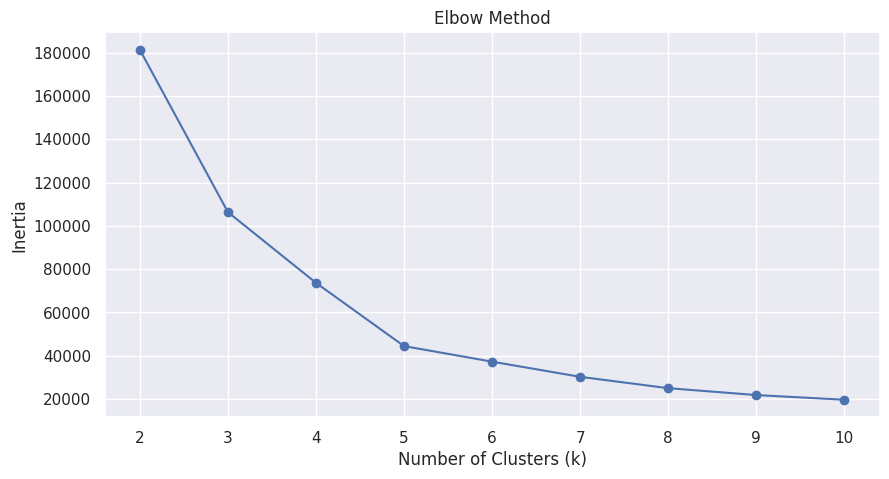

Rata-rata Silhouette untuk k = 2: 0.2968969162503008
Rata-rata Silhouette untuk k = 3: 0.46761358158775435
Rata-rata Silhouette untuk k = 4: 0.4931963109249047
Rata-rata Silhouette untuk k = 5: 0.553931997444648
Rata-rata Silhouette untuk k = 6: 0.5379675585622219
Rata-rata Silhouette untuk k = 7: 0.5264283703685728
Rata-rata Silhouette untuk k = 8: 0.45827056882053113
Rata-rata Silhouette untuk k = 9: 0.45819645551960536
Rata-rata Silhouette untuk k = 10: 0.4467356774401869
------------------------------------------------------------
Nilai inertia untuk k = 2: 181363.59595959593
Nilai inertia untuk k = 3: 106348.37306211122
Nilai inertia untuk k = 4: 73679.78903948836
Nilai inertia untuk k = 5: 44448.4554479337
Nilai inertia untuk k = 6: 37265.86520484346
Nilai inertia untuk k = 7: 30259.65720728547
Nilai inertia untuk k = 8: 25011.839349156588
Nilai inertia untuk k = 9: 21838.86369282892
Nilai inertia untuk k = 10: 19669.710998301212


In [ ]:
# Memilih fitur yang ingin digunakan (income dan Spending Score)
selected_features = data_mall_4kol[['income', 'spending']]

# Inisialisasi nilai K yang ingin digunakan
nilai_k = [2, 3, 4, 5, 6, 7, 8, 9, 10]

# List untuk menyimpan nilai inertia dan rata-rata Silhouette untuk setiap nilai k
inertia_values = []
silhouette_avg = []

# Melakukan pengelompokkan dengan nilai k yang berbeda
for k in nilai_k:
    # Membuat model k-Means dengan jumlah kelompok k
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(selected_features)

    # Menambahkan nilai inertia ke dalam list
    inertia_values.append(kmeans.inertia_)

    # Menghitung rata-rata koefisien Silhouette
    labels = kmeans.labels_
    silhouette_avg.append(silhouette_score(selected_features, labels))

# Plot untuk Elbow Method (inertia vs nilai k)
plt.figure(figsize=(10, 5))
plt.plot(nilai_k, inertia_values, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()

# Menampilkan rata-rata koefisien Silhouette untuk setiap nilai k
for k, silhouette in zip(nilai_k, silhouette_avg):
    print(f"Rata-rata Silhouette untuk k = {k}: {silhouette}")
print("------------------------------------------------------------")
# Menampilkan nilai inertia untuk setiap nilai k
for k, inertia in zip(nilai_k, inertia_values):
    print(f"Nilai inertia untuk k = {k}: {inertia}")

## **5. Clustering dengan Seluruh Atribut pada Dataset**
Bandingkan hasil koefisien silhouettenya dengan atribut yang dipilih sendiri

In [ ]:
# Memilih seluruh atribut yang ingin digunakan untuk clustering
selected_features = data_mall_4kol

# Inisialisasi nilai K (jumlah kelompok) yang diinginkan
k = 6

# Melakukan clustering dengan algoritma K-Means
kmeans = KMeans(n_clusters=k)
kmeans.fit(selected_features)

# Menambahkan kolom 'cluster' ke dalam dataset hasil clustering
data_mall_4kol['cluster'] = kmeans.labels_

# Menampilkan hasil clustering
print("Hasil Clustering dengan K-Means (k=6):")
print(  data_mall_4kol[['gender', 'Age', 'income', 'spending', 'cluster']])

Hasil Clustering dengan K-Means (k=6):
     gender  Age  income  spending  cluster
0         0   19      15        39        4
1         0   21      15        81        2
2         1   20      16         6        4
3         1   23      16        77        2
4         1   31      17        40        4
..      ...  ...     ...       ...      ...
195       1   35     120        79        1
196       1   45     126        28        3
197       0   32     126        74        1
198       0   32     137        18        3
199       0   30     137        83        1

[200 rows x 5 columns]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
# Melakukan clustering dengan algoritma K-Means
kmeans = KMeans(n_clusters=k)
kmeans.fit(selected_features)

# Menghitung koefisien Silhouette
silhouette_avg = silhouette_score(selected_features, kmeans.labels_)

# Menampilkan nilai rata-rata koefisien Silhouette
print(f"Nilai rata-rata koefisien Silhouette untuk k=6: {silhouette_avg}")

Nilai rata-rata koefisien Silhouette untuk k=6: 0.41566413156672893


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


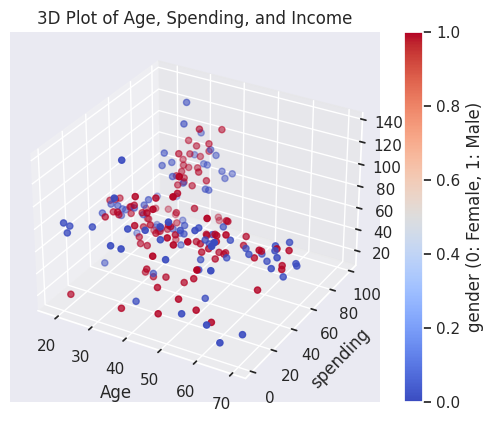

In [ ]:
# Mendefinisikan variabel untuk plot
x = data_mall_4kol['Age']
y = data_mall_4kol['spending']
z = data_mall_4kol['income']
colors = data_mall_4kol['gender']  # Warna berdasarkan gender

# Membuat plot 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot scatter 3D
scatter = ax.scatter(x, y, z, c=colors, cmap='coolwarm')

# Label sumbu
ax.set_xlabel('Age')
ax.set_ylabel('spending')
ax.set_zlabel('income')

# Menambahkan colorbar
plt.colorbar(scatter, label='gender (0: Female, 1: Male)')

# Menampilkan plot
plt.title('3D Plot of Age, Spending, and Income')
plt.show()

## **6. Analisis dan kesimpulan K-Means**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


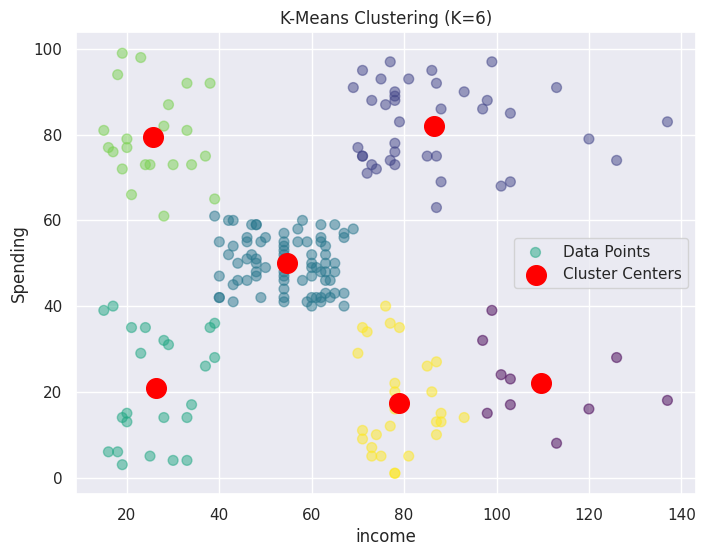

In [ ]:
# Memilih kolom age dan spending sebagai fitur untuk clustering
features = data_mall_4kol[['income', 'spending']]

# Melakukan K-Means dengan K=6
kmeans = KMeans(n_clusters=6)
kmeans.fit(features)

# Mendapatkan pusat klaster
centers = kmeans.cluster_centers_

# Mendapatkan label klaster untuk setiap titik data
labels = kmeans.labels_

# Membuat scatter plot untuk merepresentasikan kelompok
plt.figure(figsize=(8, 6))

# Plot titik data
plt.scatter(features['income'], features['spending'], c=labels, cmap='viridis', s=50, alpha=0.5, label='Data Points')

# Plot pusat klaster
plt.scatter(centers[:, 0], centers[:, 1], c='red', marker='o', s=200, label='Cluster Centers')

plt.xlabel('income')
plt.ylabel('Spending')
plt.title('K-Means Clustering (K=6)')
plt.legend()
plt.show()

In [ ]:
# Memilih kolom age dan spending sebagai fitur untuk clustering
features = data_mall_4kol[['income', 'spending']]

# Melakukan K-Means dengan K=6
kmeans = KMeans(n_clusters=6)
kmeans.fit(features)

# Mendapatkan label klaster untuk setiap titik data
labels = kmeans.labels_

# Menambahkan label klaster ke dalam DataFrame
data_mall_4kol['cluster'] = labels

# Menghitung nilai centroid (rata-rata tiap atribut) dan jumlah anggota tiap klaster
cluster_info = data_mall_4kol.groupby('cluster').agg({'income': ['mean', 'min', 'max', 'count'],
                                            'spending': ['mean', 'min', 'max', 'count']})

# Menampilkan informasi tiap kelompok
for i in range(len(cluster_info)):
    print(f"\nCluster {i+1}:")
    print(f"Nilai Centroid (Rata-rata):")
    print(f"income: {cluster_info.iloc[i]['income']['mean']}")
    print(f"Spending: {cluster_info.iloc[i]['spending']['mean']}")
    print(f"Jumlah Anggota: {cluster_info.iloc[i]['income']['count']}")
    print(f"Rentang Nilai tiap atribut:")
    print(f"income (Min-Max): {cluster_info.iloc[i]['income']['min']}-{cluster_info.iloc[i]['income']['max']}")
    print(f"Spending (Min-Max): {cluster_info.iloc[i]['spending']['min']}-{cluster_info.iloc[i]['spending']['max']}")


Cluster 1:
Nilai Centroid (Rata-rata):
income: 25.727272727272727
Spending: 79.36363636363636
Jumlah Anggota: 22.0
Rentang Nilai tiap atribut:
income (Min-Max): 15.0-39.0
Spending (Min-Max): 61.0-99.0

Cluster 2:
Nilai Centroid (Rata-rata):
income: 79.0
Spending: 16.59259259259259
Jumlah Anggota: 27.0
Rentang Nilai tiap atribut:
income (Min-Max): 70.0-93.0
Spending (Min-Max): 1.0-36.0

Cluster 3:
Nilai Centroid (Rata-rata):
income: 54.88607594936709
Spending: 49.89873417721519
Jumlah Anggota: 79.0
Rentang Nilai tiap atribut:
income (Min-Max): 39.0-76.0
Spending (Min-Max): 40.0-61.0

Cluster 4:
Nilai Centroid (Rata-rata):
income: 86.53846153846153
Spending: 82.12820512820512
Jumlah Anggota: 39.0
Rentang Nilai tiap atribut:
income (Min-Max): 69.0-137.0
Spending (Min-Max): 63.0-97.0

Cluster 5:
Nilai Centroid (Rata-rata):
income: 26.304347826086957
Spending: 20.91304347826087
Jumlah Anggota: 23.0
Rentang Nilai tiap atribut:
income (Min-Max): 15.0-39.0
Spending (Min-Max): 3.0-40.0

Cluste

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


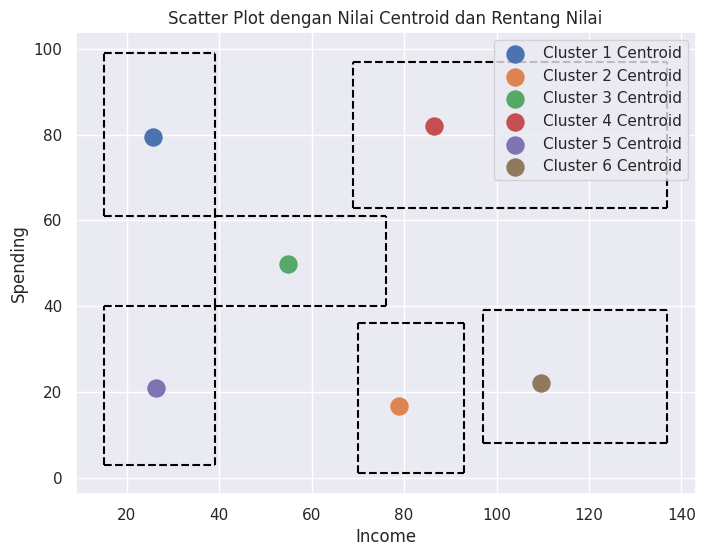

In [ ]:
# Data klaster yang diberikan
clusters = {
    1: {'centroid': (25.727, 79.364), 'range_income': (15.0, 39.0), 'range_spending': (61.0, 99.0)},
    2: {'centroid': (79.0, 16.593), 'range_income': (70.0, 93.0), 'range_spending': (1.0, 36.0)},
    3: {'centroid': (54.886, 49.899), 'range_income': (39.0, 76.0), 'range_spending': (40.0, 61.0)},
    4: {'centroid': (86.538, 82.128), 'range_income': (69.0, 137.0), 'range_spending': (63.0, 97.0)},
    5: {'centroid': (26.304, 20.913), 'range_income': (15.0, 39.0), 'range_spending': (3.0, 40.0)},
    6: {'centroid': (109.7, 22.0), 'range_income': (97.0, 137.0), 'range_spending': (8.0, 39.0)}
}

# Membuat scatter plot
plt.figure(figsize=(8, 6))

# Plot nilai centroid
for cluster, info in clusters.items():
    plt.scatter(info['centroid'][0], info['centroid'][1], label=f'Cluster {cluster} Centroid', s=150)

    # Plot rentang nilai
    plt.plot(info['range_income'], [info['range_spending'][0], info['range_spending'][0]], color='black', linestyle='--')
    plt.plot(info['range_income'], [info['range_spending'][1], info['range_spending'][1]], color='black', linestyle='--')
    plt.plot([info['range_income'][0], info['range_income'][0]], info['range_spending'], color='black', linestyle='--')
    plt.plot([info['range_income'][1], info['range_income'][1]], info['range_spending'], color='black', linestyle='--')

plt.xlabel('Income')
plt.ylabel('Spending')
plt.title('Scatter Plot dengan Nilai Centroid dan Rentang Nilai')
plt.legend()
plt.grid(True)
plt.show()

#2. Penyiapan data dan Agglomerative Hierarchical Clustering untuk segmentasi customer mall serta pemeriksaan kualitas cluster menggunakan elbow method dan koefisien Silhouette

#**Hierarchical Claustering**

## **1. Import Library**

In [ ]:
from google.colab import drive
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster, cut_tree
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
from math import isnan
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

## **2. Data Preparation**

In [ ]:
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


In [ ]:
df2 = pd.read_csv("/content/drive/MyDrive/Machine Learning/Unsupervised Learning/K-Means versi 2/Copy of Mall_Customers.csv")

In [ ]:
df2 = df2.rename(columns={'Genre': 'gender'})
df2 = df2.rename(columns={'Annual Income (k$)': 'income'})
df2 = df2.rename(columns={'Spending Score (1-100)': 'spending'})

In [ ]:
df2['gender'] = df2['gender'].map({'Male': 0, 'Female': 1})
df2.head()

,CustomerID,gender,Age,income,spending
0,1,0,19,15,39
1,2,0,21,15,81
2,3,1,20,16,6
3,4,1,23,16,77
4,5,1,31,17,40


In [ ]:
# Pilih fitur-fitur (4 atribut) yang akan dikelompokkan (tidak mengikutsertakan atribut CustomerID)
data_mall_4kol2 = df2[['gender', 'Age',	'income', 'spending']]

In [ ]:
# let's look through our data
data_mall_4kol2.head()
# display shape of data
print("Shape:",data_mall_4kol2.shape)
# check for any null value
data_mall_4kol2.isna().sum()

Shape: (200, 4)


gender      0
Age         0
income      0
spending    0
dtype: int64

In [ ]:
# get information about data
data_mall_4kol2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   gender    200 non-null    int64
 1   Age       200 non-null    int64
 2   income    200 non-null    int64
 3   spending  200 non-null    int64
dtypes: int64(4)
memory usage: 6.4 KB


In [ ]:
# Buat numpy array P dari dataframe data_mall_4kol
P = np.array(data_mall_4kol2.values)
P

array([[  0,  19,  15,  39],
       [  0,  21,  15,  81],
       [  1,  20,  16,   6],
       [  1,  23,  16,  77],
       [  1,  31,  17,  40],
       [  1,  22,  17,  76],
       [  1,  35,  18,   6],
       [  1,  23,  18,  94],
       [  0,  64,  19,   3],
       [  1,  30,  19,  72],
       [  0,  67,  19,  14],
       [  1,  35,  19,  99],
       [  1,  58,  20,  15],
       [  1,  24,  20,  77],
       [  0,  37,  20,  13],
       [  0,  22,  20,  79],
       [  1,  35,  21,  35],
       [  0,  20,  21,  66],
       [  0,  52,  23,  29],
       [  1,  35,  23,  98],
       [  0,  35,  24,  35],
       [  0,  25,  24,  73],
       [  1,  46,  25,   5],
       [  0,  31,  25,  73],
       [  1,  54,  28,  14],
       [  0,  29,  28,  82],
       [  1,  45,  28,  32],
       [  0,  35,  28,  61],
       [  1,  40,  29,  31],
       [  1,  23,  29,  87],
       [  0,  60,  30,   4],
       [  1,  21,  30,  73],
       [  0,  53,  33,   4],
       [  0,  18,  33,  92],
       [  1,  

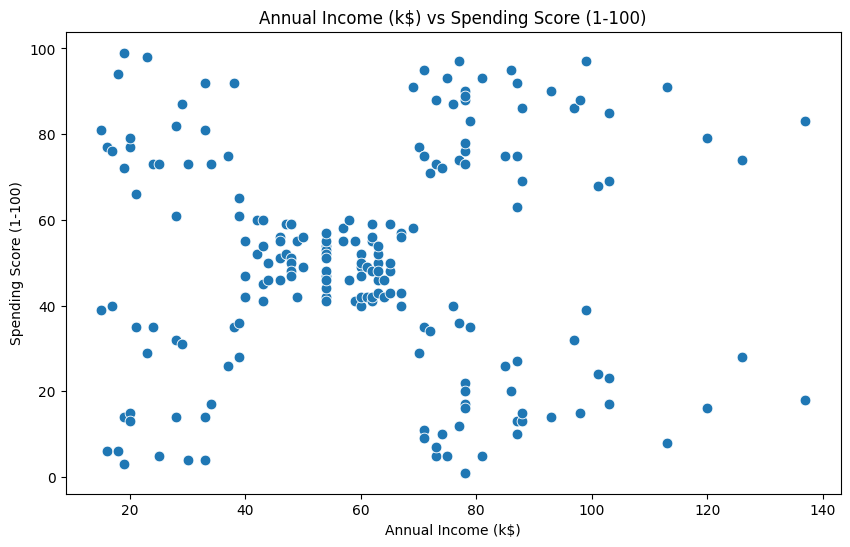

In [ ]:
X = df2[["income","spending"]]
#Scatterplot of the input data

plt.figure(figsize=(10,6))
sns.scatterplot(x = 'income',y = 'spending',  data = X  ,s = 60 )
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Annual Income (k$) vs Spending Score (1-100)')
plt.show()

## **3. EDA**

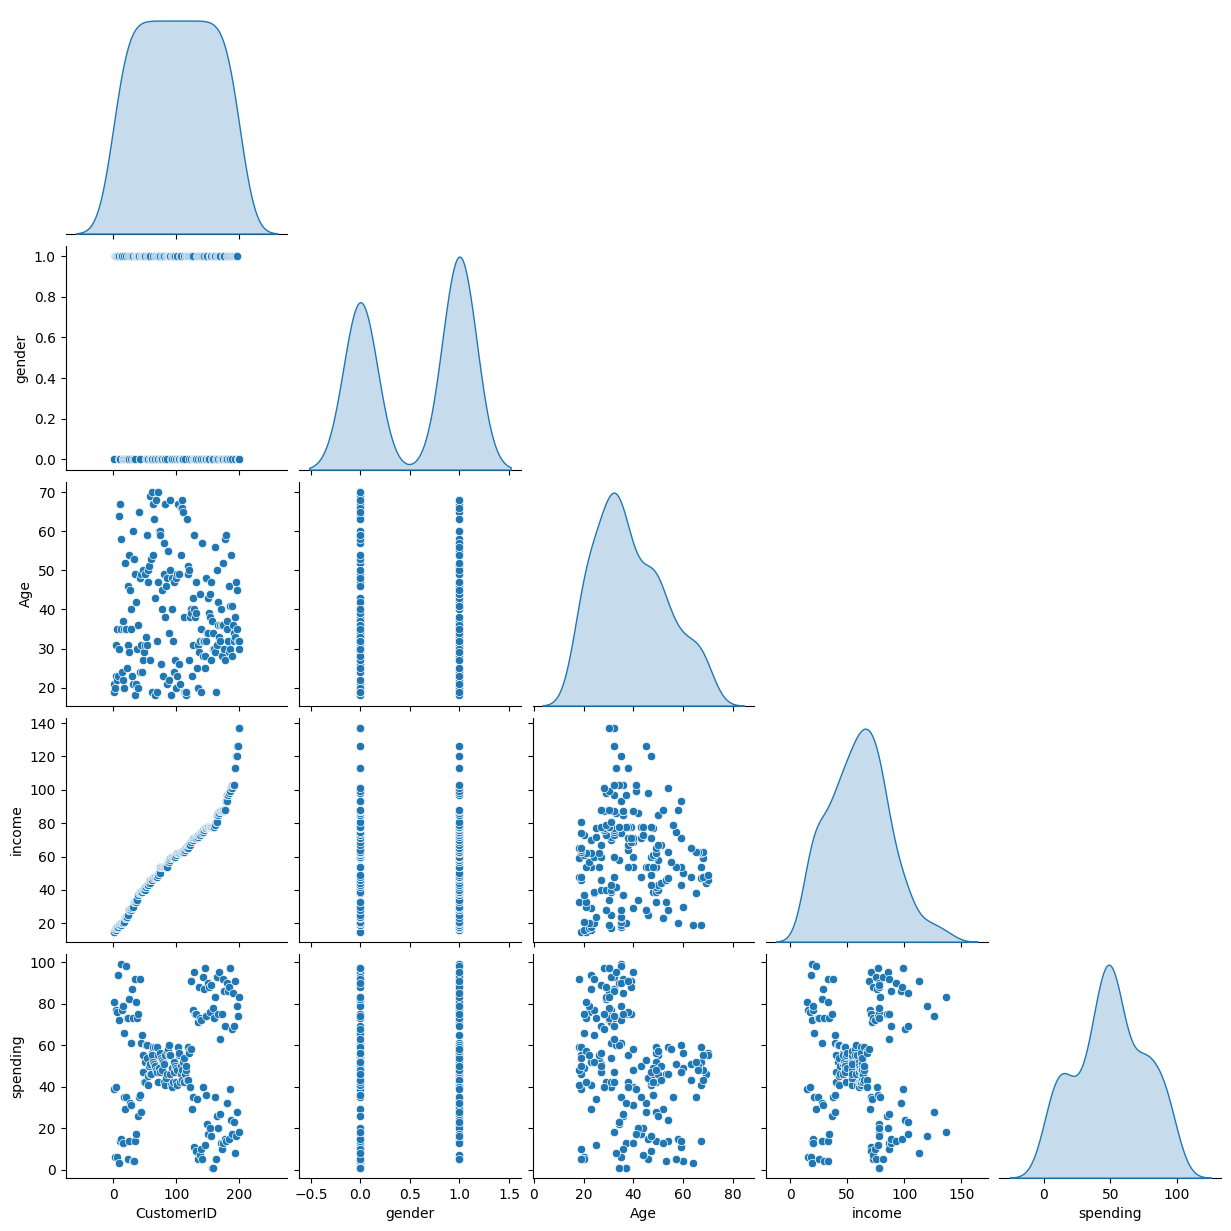

In [ ]:
sns.pairplot(df2,corner=True,diag_kind="kde")
plt.show()

In [ ]:
#drop kolom yang tidak perlu sebelum melakukan clustering
df_c = df2.drop(['CustomerID','gender'],axis=1,inplace=True)

In [ ]:
df2.head()

,Age,income,spending
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


The Hopkins statistic (introduced by Brian Hopkins and John Gordon Skellam) is a way of measuring the cluster tendency of a data set.It acts as a statistical hypothesis test where the null hypothesis is that the data is generated by a Poisson point process and are thus uniformly randomly distributed. A value close to 1 tends to indicate the data is highly clustered, random data will tend to result in values around 0.5, and uniformly distributed data will tend to result in values close to 0.

• If the value is between {0.01, ...,0.3}, the data is regularly spaced.

• If the value is around 0.5, it is random.

• If the value is between {0.7, ..., 0.99}, it has a high tendency to cluster.

In [ ]:
def hopkins(X):
    d = X.shape[1]
    n = len(X)
    m = int(0.1 * n)
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)

    rand_X = sample(range(0, n, 1), m)

    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])

    HS = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(HS):
        print(ujd, wjd)
        HS = 0

    return HS

In [ ]:
Hopkins_score=round(hopkins(df2),2)
print(format(Hopkins_score))

0.73


berdasarkan kategori nilai hopkins, maka data memiliki kecenderungan yang tinggi untuk membentuk cluster/kelompok

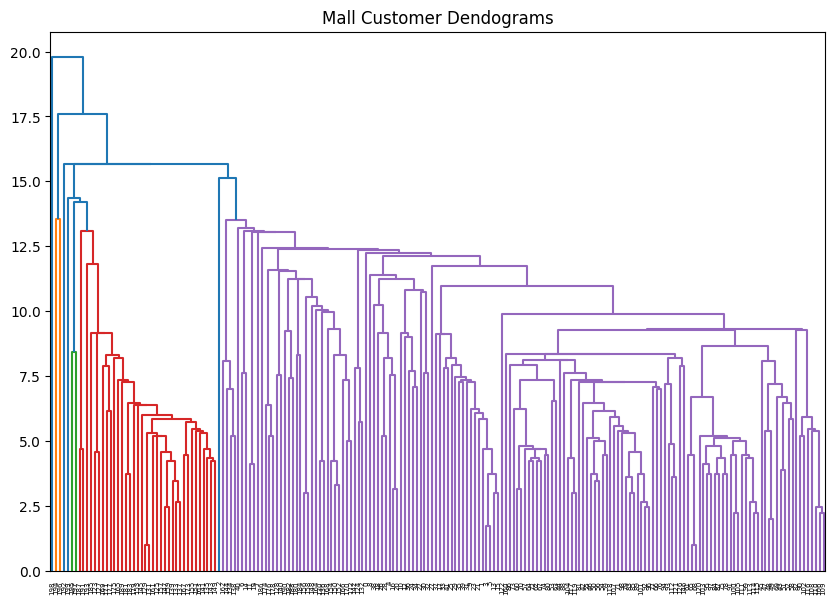

In [ ]:
#visualisasi data mall customer dengan dendogram
plt.figure(figsize=(10, 7))
plt.title("Mall Customer Dendograms")
#method2 yg dapat dipakai: https://docs.scipy.org/doc/scipy/reference/cluster.hierarchy.html
dend = sch.dendrogram(sch.linkage(P, method='single'))
plt.show()

##**4.Agglomerative Hierarchical Clustering**
Sebelum melakukan single/multiple linkage, kita harus melakukan scalling data terlebih dahulu karena perhitungan jarak amat sensitif terhadap perbedaan skala data.

In [ ]:
scaler = MinMaxScaler()
model = scaler.fit(df2)
scaled_df = model.transform(df2)

In [ ]:
scaled_df

array([[0.01923077, 0.        , 0.3877551 ],
       [0.05769231, 0.        , 0.81632653],
       [0.03846154, 0.00819672, 0.05102041],
       [0.09615385, 0.00819672, 0.7755102 ],
       [0.25      , 0.01639344, 0.39795918],
       [0.07692308, 0.01639344, 0.76530612],
       [0.32692308, 0.02459016, 0.05102041],
       [0.09615385, 0.02459016, 0.94897959],
       [0.88461538, 0.03278689, 0.02040816],
       [0.23076923, 0.03278689, 0.7244898 ],
       [0.94230769, 0.03278689, 0.13265306],
       [0.32692308, 0.03278689, 1.        ],
       [0.76923077, 0.04098361, 0.14285714],
       [0.11538462, 0.04098361, 0.7755102 ],
       [0.36538462, 0.04098361, 0.12244898],
       [0.07692308, 0.04098361, 0.79591837],
       [0.32692308, 0.04918033, 0.34693878],
       [0.03846154, 0.04918033, 0.66326531],
       [0.65384615, 0.06557377, 0.28571429],
       [0.32692308, 0.06557377, 0.98979592],
       [0.32692308, 0.07377049, 0.34693878],
       [0.13461538, 0.07377049, 0.73469388],
       [0.

In [ ]:
data_mall_3kol = df2[['Age',	'income', 'spending']]

In [ ]:
y = np.array(data_mall_3kol)
y

array([[ 19,  15,  39],
       [ 21,  15,  81],
       [ 20,  16,   6],
       [ 23,  16,  77],
       [ 31,  17,  40],
       [ 22,  17,  76],
       [ 35,  18,   6],
       [ 23,  18,  94],
       [ 64,  19,   3],
       [ 30,  19,  72],
       [ 67,  19,  14],
       [ 35,  19,  99],
       [ 58,  20,  15],
       [ 24,  20,  77],
       [ 37,  20,  13],
       [ 22,  20,  79],
       [ 35,  21,  35],
       [ 20,  21,  66],
       [ 52,  23,  29],
       [ 35,  23,  98],
       [ 35,  24,  35],
       [ 25,  24,  73],
       [ 46,  25,   5],
       [ 31,  25,  73],
       [ 54,  28,  14],
       [ 29,  28,  82],
       [ 45,  28,  32],
       [ 35,  28,  61],
       [ 40,  29,  31],
       [ 23,  29,  87],
       [ 60,  30,   4],
       [ 21,  30,  73],
       [ 53,  33,   4],
       [ 18,  33,  92],
       [ 49,  33,  14],
       [ 21,  33,  81],
       [ 42,  34,  17],
       [ 30,  34,  73],
       [ 36,  37,  26],
       [ 20,  37,  75],
       [ 65,  38,  35],
       [ 24,  38

##**5. Hierarchical Clustering**

### Single Linkage

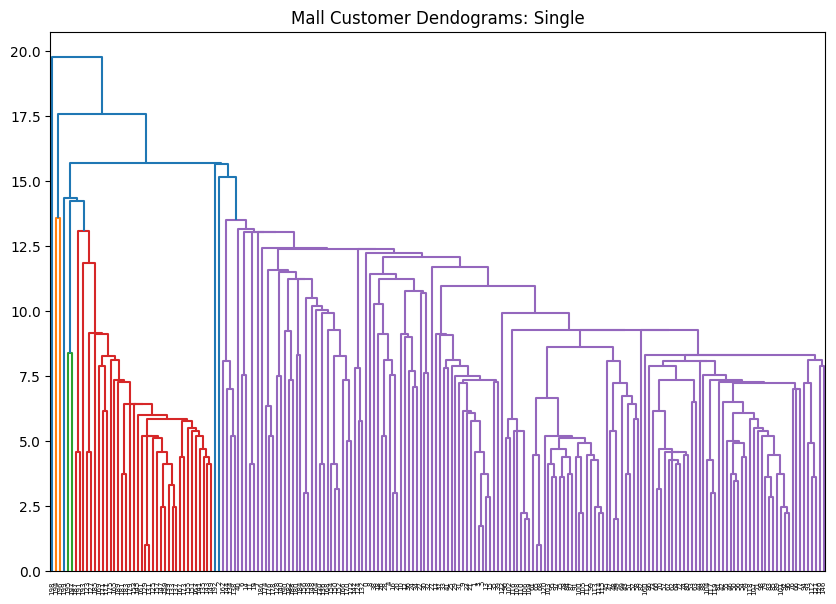

In [ ]:
# Single linkage
plt.figure(figsize=(10, 7))
plt.title("Mall Customer Dendograms: Single")
dend = sch.dendrogram(sch.linkage(y, method='single'))
plt.show()

Hasil yang terbentuk dari dedogram single linkage menunjukan dedogram yang kurang cocok / baik pada kasus kali ini karena setiap cluster kurang terlihat dengan jelas dan hal ini dapat menyulitkan dalam pemotongan cluster.

In [ ]:
# Menghitung linkage matrix
Z = sch.linkage(y, method='single')

# Mendapatkan nilai korelasi distance terbesar
max_distance_correlation = max(Z[:, 2])  # Mengambil nilai distance terbesar dari kolom ketiga matrix Z

print("Nilai korelasi distance terbesar dari dendrogram (single):", max_distance_correlation)

Nilai korelasi distance terbesar dari dendrogram (single): 19.748417658131498


### Complete Linkage

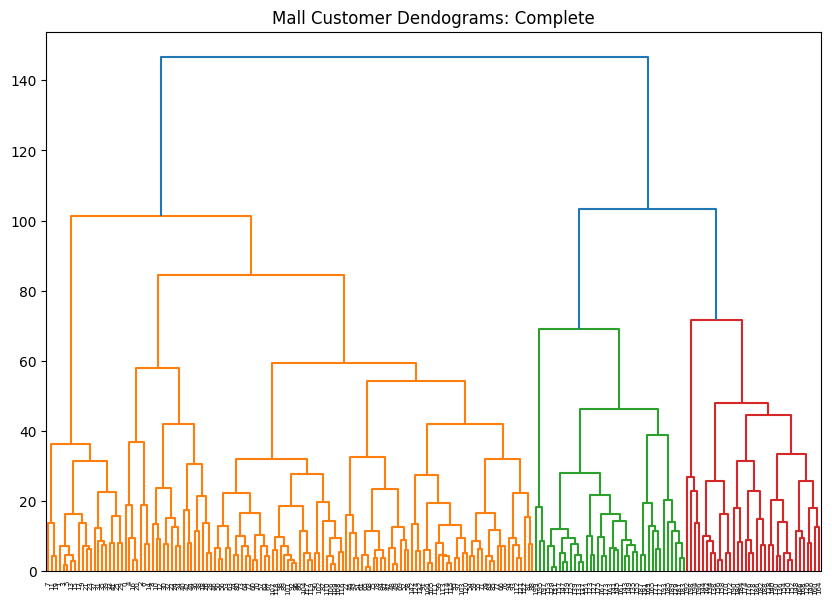

In [ ]:
# Complete Linkage
plt.figure(figsize=(10, 7))
plt.title("Mall Customer Dendograms: Complete")
dend = sch.dendrogram(sch.linkage(y, method='complete'))
plt.show()

Hasil yang terbentuk dari dendrogram complete linkage menunjukkan dendrogram yang cukup compact, dimana setiap cluster terlihat memiliki partisi yang cukup jelas. Hal ini akan mempermudah saat pemotongan dendrogram untuk membentuk banyak cluster.

In [ ]:
# Menghitung linkage matrix
Z = sch.linkage(y, method='complete')

# Mendapatkan nilai korelasi distance terbesar
max_distance_correlation = max(Z[:, 2])  # Mengambil nilai distance terbesar dari kolom ketiga matrix Z

print("Nilai korelasi distance terbesar dari dendrogram (complete):", max_distance_correlation)

Nilai korelasi distance terbesar dari dendrogram (complete): 146.56056768449008


### Average Linkage

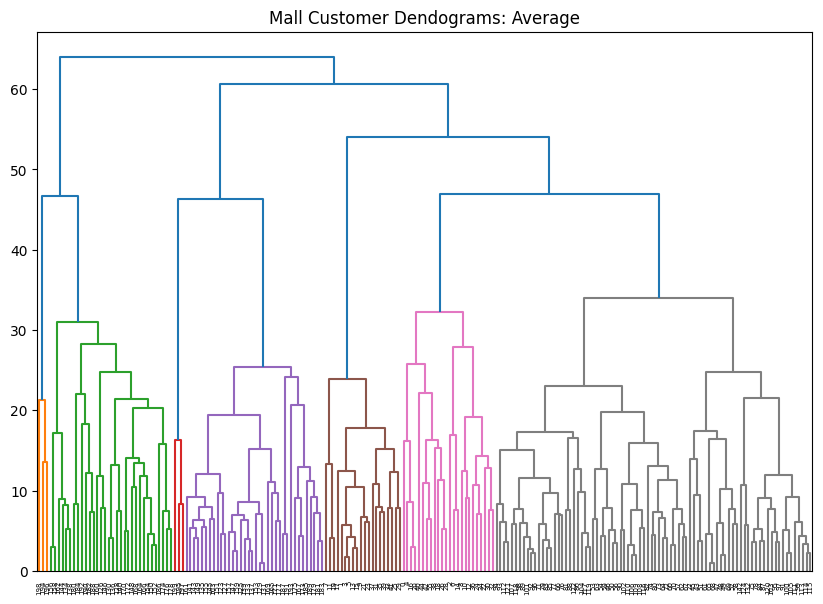

In [ ]:
# Average Linkage
plt.figure(figsize=(10, 7))
plt.title("Mall Customer Dendograms: Average")
dend = sch.dendrogram(sch.linkage(y, method='average'))
plt.show()

Pada Average linkage hampir mirip dengan centroid dimana terdapat ketidak teraturan distance pada dendrogram di beberapa cabang, dimana nilai distance antar cluster yang lebih rendah dibandingkan nilai distance antar observasinya. Kondisi ini disebut juga inversion.

In [ ]:
# Menghitung linkage matrix
Z = sch.linkage(y, method='average')

# Mendapatkan nilai korelasi distance terbesar
max_distance_correlation = max(Z[:, 2])  # Mengambil nilai distance terbesar dari kolom ketiga matrix Z

print("Nilai korelasi distance terbesar dari dendrogram (average):", max_distance_correlation)

Nilai korelasi distance terbesar dari dendrogram (average): 63.96014113416277


### Ward Linkage

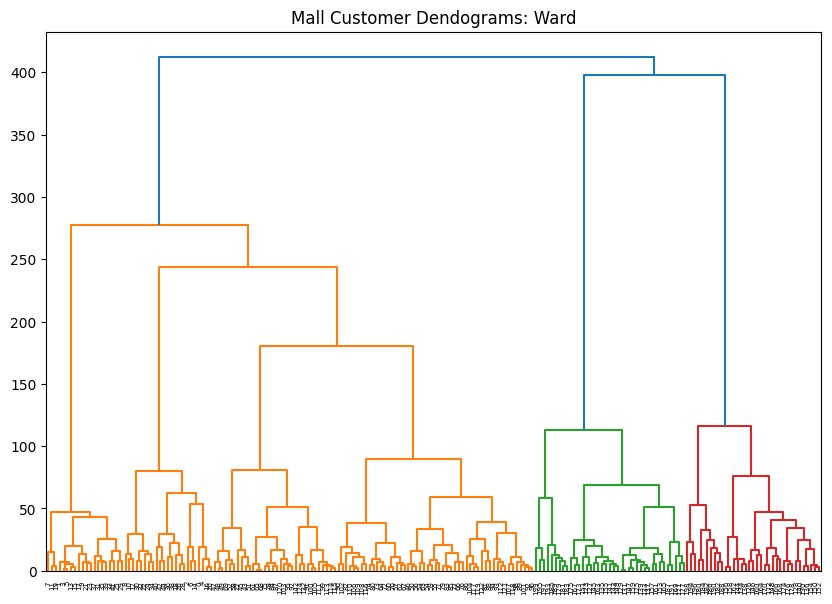

In [ ]:
# Ward Linkage
plt.figure(figsize=(10, 7))
plt.title("Mall Customer Dendograms: Ward")
dend = sch.dendrogram(sch.linkage(y, method='ward'))
plt.show()

Dendrogram yang diperoleh dari metode ward’s terlihat nilai height yang rendah atau similarity yang amat tinggi antar observasinya. Hal ini dikarenakan cara kerja metode ward’s minimum variance yang meminimumkan nilai within sum of squared (wss) tiap cluster.

In [ ]:
# Menghitung linkage matrix
Z = sch.linkage(y, method='ward')

# Mendapatkan nilai korelasi distance terbesar
max_distance_correlation = max(Z[:, 2])  # Mengambil nilai distance terbesar dari kolom ketiga matrix Z

print("Nilai korelasi distance terbesar dari dendrogram (Ward):", max_distance_correlation)

Nilai korelasi distance terbesar dari dendrogram (Ward): 411.9159845905694


### Centroid Linkage

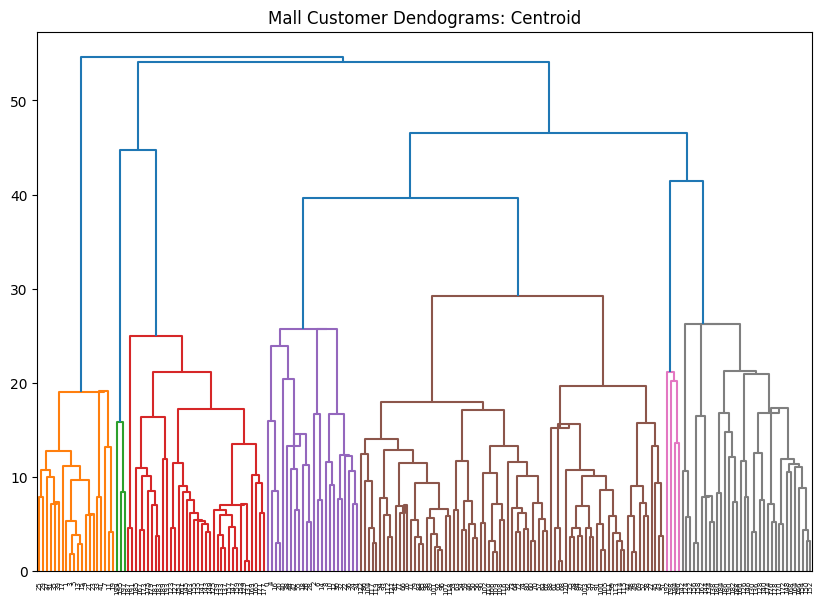

In [ ]:
#Centroid Linkage
plt.figure(figsize=(10, 7))
plt.title("Mall Customer Dendograms: Centroid")
dend = sch.dendrogram(sch.linkage(y, method='centroid'))
plt.show()

Pada centroid linkage terdapat ketidak teraturan distance pada dendrogram di beberapa cabang, dimana nilai distance antar cluster yang lebih rendah dibandingkan nilai distance antar observasinya. Kondisi ini disebut juga inversion.

### Medium Linkage

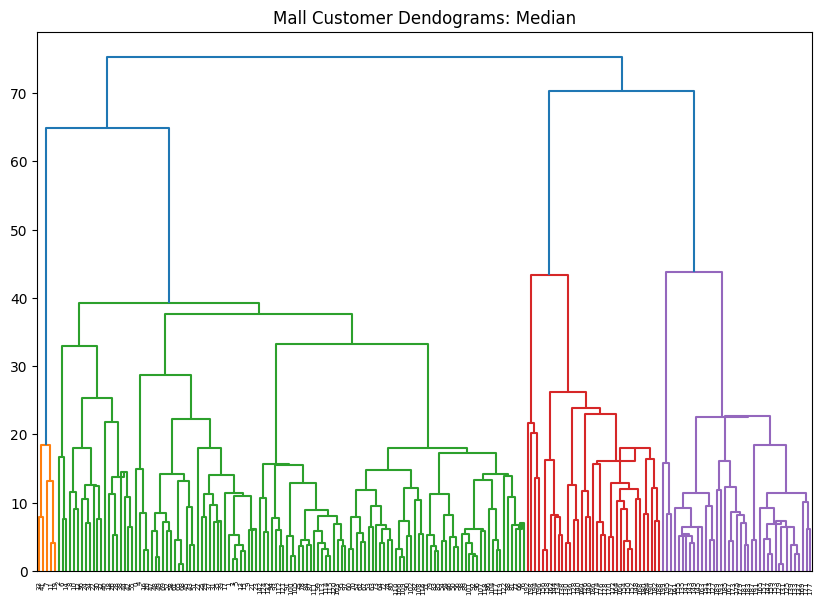

In [ ]:
#Median Linkage
plt.figure(figsize=(10, 7))
plt.title("Mall Customer Dendograms: Median")
dend = sch.dendrogram(sch.linkage(y, method='median'))
plt.show()

pada median linkage terdapat ketidak teraturan distance pada dendrogram di beberapa cabang

## **6.Validasi Clauster**

###Silhouette Single Linkage

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be

Rata-rata Silhouette untuk k = 2: 0.39088488327271015
Rata-rata Silhouette untuk k = 3: 0.3049360034125826
Rata-rata Silhouette untuk k = 4: 0.26287653629417757
Rata-rata Silhouette untuk k = 5: 0.24294247504120228
Rata-rata Silhouette untuk k = 6: 0.16494447557214534
Rata-rata Silhouette untuk k = 7: 0.1365029737488583
Rata-rata Silhouette untuk k = 8: 0.12027212667359578
Rata-rata Silhouette untuk k = 9: 0.11645642399674593
Rata-rata Silhouette untuk k = 10: 0.10820290984499768
Rata-rata Silhouette untuk k = 11: -0.04747144264023203
Rata-rata Silhouette untuk k = 12: -0.07799271451471582
Rata-rata Silhouette untuk k = 13: -0.07180106812279133
Rata-rata Silhouette untuk k = 14: -0.11022132640688702
Rata-rata Silhouette untuk k = 15: -0.11593367597552198


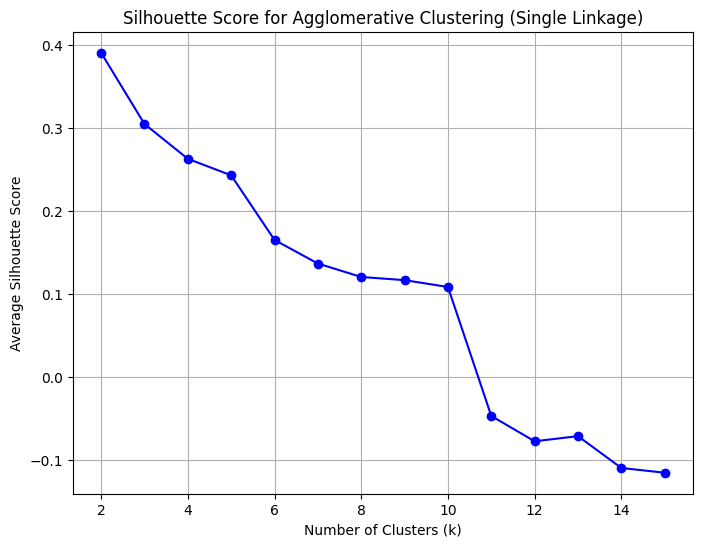

In [ ]:
#Metode Single
silhouette_avg = []
K = range(2,16)
for k in K:
    agglo_model = AgglomerativeClustering(n_clusters=k, affinity='euclidean', linkage='single')
    agglo_model.fit_predict(y)
    score = silhouette_score(y, agglo_model.labels_,  metric='euclidean')
    silhouette_avg.append(score)

for k, silhouette in zip(K, silhouette_avg):
    print(f"Rata-rata Silhouette untuk k = {k}: {silhouette}")

# Plot Silhouette
plt.figure(figsize=(8, 6))
plt.plot(K, silhouette_avg, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Average Silhouette Score')
plt.title('Silhouette Score for Agglomerative Clustering (Single Linkage)')
plt.grid()
plt.show()

### Silhouette Complete Linkage

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be

Rata-rata Silhouette untuk k = 2: 0.2992593203550994
Rata-rata Silhouette untuk k = 3: 0.38141795042544546
Rata-rata Silhouette untuk k = 4: 0.41037986351850747
Rata-rata Silhouette untuk k = 5: 0.4401889024290193
Rata-rata Silhouette untuk k = 6: 0.4234860790346685
Rata-rata Silhouette untuk k = 7: 0.4143539488781772
Rata-rata Silhouette untuk k = 8: 0.40455082725502933
Rata-rata Silhouette untuk k = 9: 0.38932649507964506
Rata-rata Silhouette untuk k = 10: 0.34782678215456614
Rata-rata Silhouette untuk k = 11: 0.3298788626334757
Rata-rata Silhouette untuk k = 12: 0.3060264799609862
Rata-rata Silhouette untuk k = 13: 0.3066536342739783
Rata-rata Silhouette untuk k = 14: 0.3002060766803602
Rata-rata Silhouette untuk k = 15: 0.30448308664290097


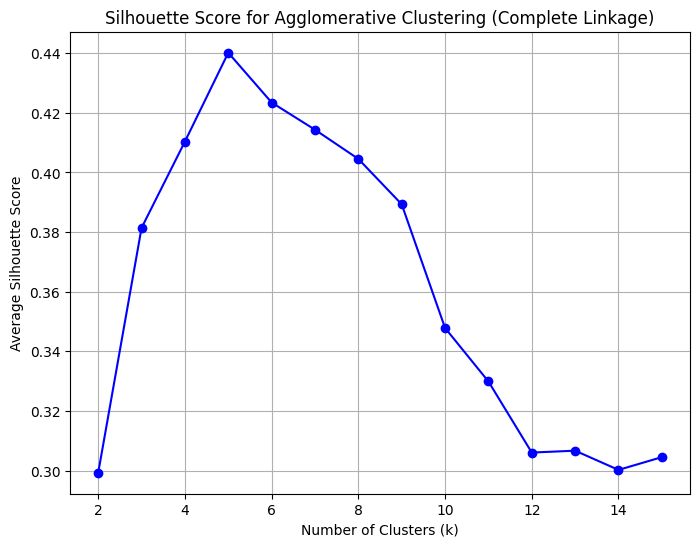

In [ ]:
#Metode Complete
silhouette_avg = []
K = range(2,16)
for k in K:
    agglo_model = AgglomerativeClustering(n_clusters=k, affinity='euclidean', linkage='complete')
    agglo_model.fit_predict(y)
    score = silhouette_score(y, agglo_model.labels_,  metric='euclidean')
    silhouette_avg.append(score)

for k, silhouette in zip(K, silhouette_avg):
    print(f"Rata-rata Silhouette untuk k = {k}: {silhouette}")

# Plot Silhouette
plt.figure(figsize=(8, 6))
plt.plot(K, silhouette_avg, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Average Silhouette Score')
plt.title('Silhouette Score for Agglomerative Clustering (Complete Linkage)')
plt.grid()
plt.show()

### Silhouette Average Linkage

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be

Rata-rata Silhouette untuk k = 2: 0.3158572920731653
Rata-rata Silhouette untuk k = 3: 0.38141795042544546
Rata-rata Silhouette untuk k = 4: 0.41037986351850747
Rata-rata Silhouette untuk k = 5: 0.43542057757306424
Rata-rata Silhouette untuk k = 6: 0.4186188585821039
Rata-rata Silhouette untuk k = 7: 0.4102108627180583
Rata-rata Silhouette untuk k = 8: 0.42466650196497924
Rata-rata Silhouette untuk k = 9: 0.41043092534302317
Rata-rata Silhouette untuk k = 10: 0.3924981008380604
Rata-rata Silhouette untuk k = 11: 0.39222424862200206
Rata-rata Silhouette untuk k = 12: 0.39361174095057266
Rata-rata Silhouette untuk k = 13: 0.38257075981994604
Rata-rata Silhouette untuk k = 14: 0.36042161676670725
Rata-rata Silhouette untuk k = 15: 0.3498812283122277


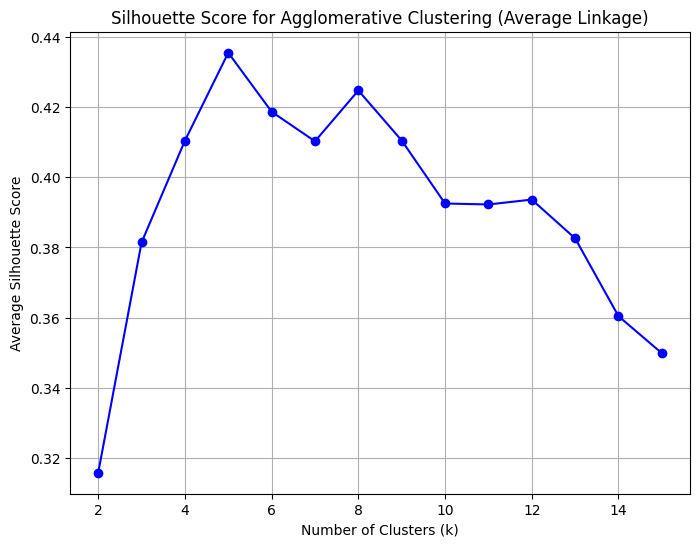

In [ ]:
#Metode Average
silhouette_avg = []
K = range(2,16)
for k in K:
    agglo_model = AgglomerativeClustering(n_clusters=k, affinity='euclidean', linkage='average')
    agglo_model.fit_predict(y)
    score = silhouette_score(y, agglo_model.labels_,  metric='euclidean')
    silhouette_avg.append(score)

for k, silhouette in zip(K, silhouette_avg):
    print(f"Rata-rata Silhouette untuk k = {k}: {silhouette}")

# Plot Silhouette
plt.figure(figsize=(8, 6))
plt.plot(K, silhouette_avg, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Average Silhouette Score')
plt.title('Silhouette Score for Agglomerative Clustering (Average Linkage)')
plt.grid()
plt.show()

###Silhouette Ward Linkage

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be

Rata-rata Silhouette untuk k = 2: 0.2992593203550994
Rata-rata Silhouette untuk k = 3: 0.38141795042544546
Rata-rata Silhouette untuk k = 4: 0.41037986351850747
Rata-rata Silhouette untuk k = 5: 0.4401889024290193
Rata-rata Silhouette untuk k = 6: 0.44308912983504156
Rata-rata Silhouette untuk k = 7: 0.4262301125101286
Rata-rata Silhouette untuk k = 8: 0.41028404899198817
Rata-rata Silhouette untuk k = 9: 0.3663955117052502
Rata-rata Silhouette untuk k = 10: 0.351820333160781
Rata-rata Silhouette untuk k = 11: 0.3463610714830034
Rata-rata Silhouette untuk k = 12: 0.3410778009986224
Rata-rata Silhouette untuk k = 13: 0.3283549555627869
Rata-rata Silhouette untuk k = 14: 0.3322538056675734
Rata-rata Silhouette untuk k = 15: 0.32842591092474593


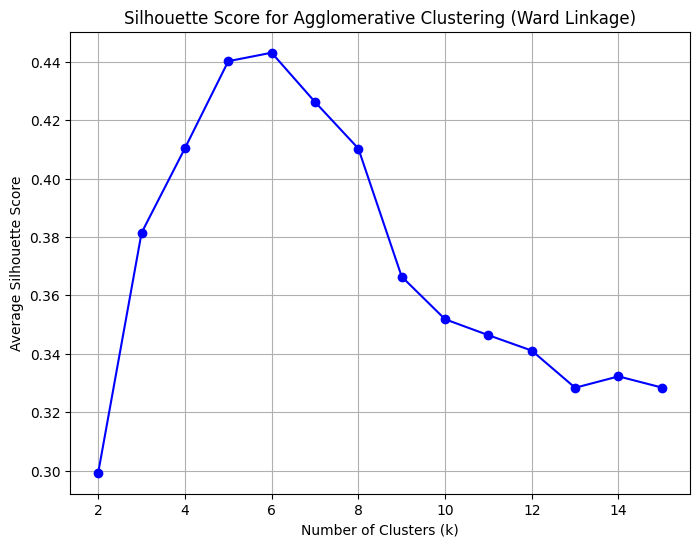

In [ ]:
#Metode Ward
silhouette_avg = []
K = range(2,16)
for k in K:
    agglo_model = AgglomerativeClustering(n_clusters=k, affinity='euclidean', linkage='ward')
    agglo_model.fit_predict(y)
    score = silhouette_score(y, agglo_model.labels_,  metric='euclidean')
    silhouette_avg.append(score)

for k, silhouette in zip(K, silhouette_avg):
    print(f"Rata-rata Silhouette untuk k = {k}: {silhouette}")

# Plot Silhouette
plt.figure(figsize=(8, 6))
plt.plot(K, silhouette_avg, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Average Silhouette Score')
plt.title('Silhouette Score for Agglomerative Clustering (Ward Linkage)')
plt.grid()
plt.show()

###Pemilihan Dendrogram

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet
from scipy.spatial.distance import pdist
import pandas as pd

methods = ['single', 'complete', 'average', 'ward']  # Metode clustering yang akan digunakan

cophenetic_distances = {}  # Dictionary untuk menyimpan nilai cophenetic distance untuk setiap metode
cophenetic_correlation = {}  # Dictionary untuk menyimpan nilai cophenetic correlation coefficient

for method in methods:
    # Lakukan hierarchical clustering menggunakan setiap metode
    Z = linkage(y, method=method)

    # Hitung cophenetic correlation coefficient
    c, coph_dists = cophenet(Z, pdist(y))

    # Simpan nilai cophenetic distance dan cophenetic correlation coefficient untuk setiap metode
    cophenetic_distances[method] = coph_dists
    cophenetic_correlation[method] = c

# Membuat DataFrame untuk menampilkan hasil cophenetic correlation coefficient
df_corr = pd.DataFrame.from_dict(cophenetic_correlation, orient='index', columns=['cophenetic_correlation'])
df_corr.index.name = 'method'
df_corr.reset_index(inplace=True)
print(df_corr)

     method  cophenetic_correlation
0    single                0.644461
1  complete                0.628109
2   average                0.688585
3      ward                0.668668


Berdasarkan nilai korelasi yang dihasilkan average linkage paling tinggi dibanding metode lainnya, disusul oleh ward linkage dan single linkage.Mempertimbangkan pula dendrogram yang dihasilkan, dendrogram dari average linkage menghasilkan kondisi inversion dimana nilai distance antar cluster yang lebih rendah dibandingkan nilai distance antar observasinya dan ditakutkan membuat hasil clustering tidak optimal. Oleh karena itu, akan dipilih metode ward linkage dengan pertimbangan hasil correlation yang tinggi dan menghasilkan dendrogram yang cukup mudah diinterpretasikan.

## **7.Cut Off Tree**

In [ ]:
Z = linkage(y, method='ward')
num_clusters = 6
labels = fcluster(Z, num_clusters, criterion='maxclust')

# Menampilkan label klaster
print("Cluster Labels:")
print(labels)

Cluster Labels:
[2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 3 2 1 2 1 2 1 2 1 2
 1 2 1 2 1 2 3 2 3 4 3 3 3 4 3 3 4 4 4 4 4 3 4 4 3 4 4 4 3 4 4 3 3 4 4 4 4
 4 3 4 4 3 4 4 4 4 4 3 4 4 3 4 4 4 3 4 4 4 3 4 3 4 3 3 4 4 3 4 3 4 4 4 4 4
 3 4 3 3 3 4 4 4 4 3 4 4 5 3 5 6 5 6 5 6 5 3 5 6 5 6 5 6 5 6 5 3 5 6 5 6 5
 6 5 6 5 6 5 6 5 6 5 6 5 6 5 6 5 6 5 6 5 6 5 6 5 6 5 6 5 6 5 6 5 6 5 6 5 6
 5 6 5 6 5 6 5 6 5 6 5 6 5 6 5]


In [ ]:
df2['Cluster_Id'] = labels
df2.head()

,Age,income,spending,Cluster_Id
0,19,15,39,2
1,21,15,81,1
2,20,16,6,2
3,23,16,77,1
4,31,17,40,2


In [ ]:
# Number of customers in each cluster
df2['Cluster_Id'].value_counts(ascending=True)

1    20
2    23
3    32
6    35
5    39
4    51
Name: Cluster_Id, dtype: int64

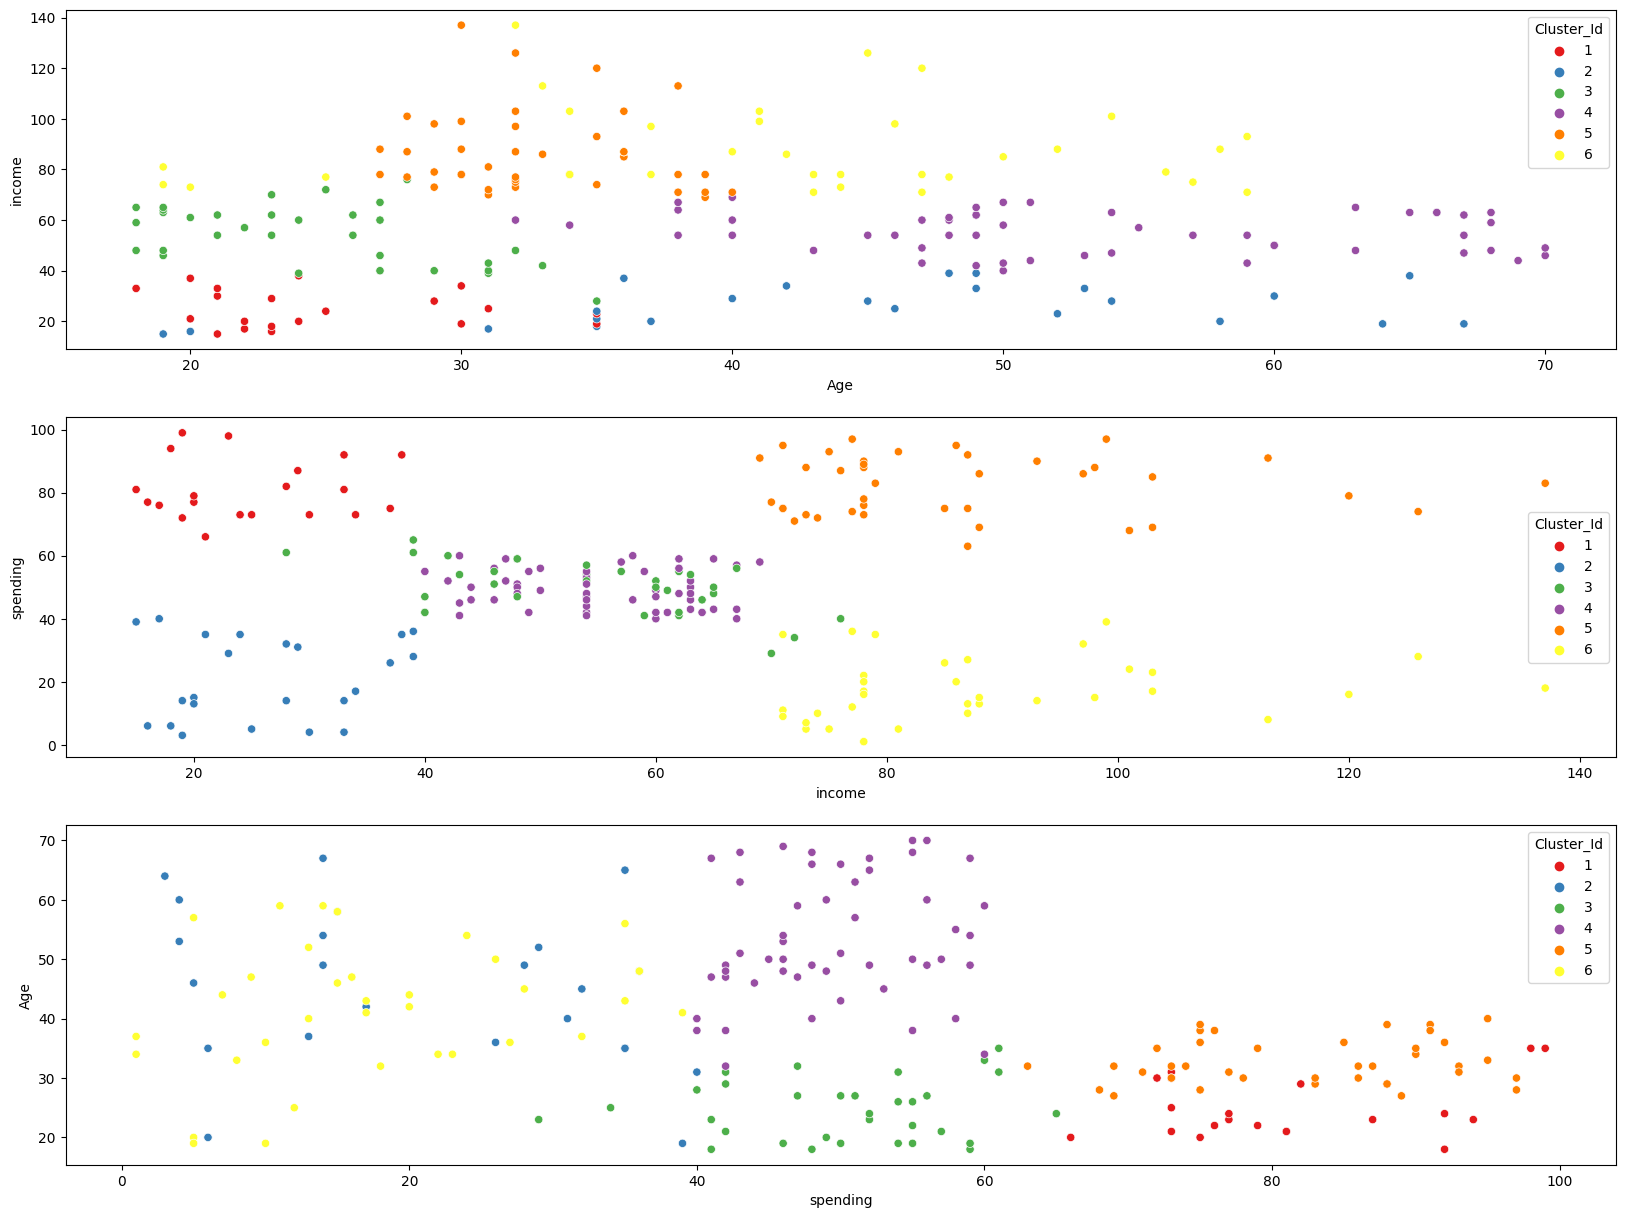

In [ ]:
plt.figure(figsize = (20,15))
plt.subplot(3,1,1)
sns.scatterplot(x = 'Age', y = 'income',hue='Cluster_Id',data = df2,legend='full',palette="Set1")
plt.subplot(3,1,2)
sns.scatterplot(x = 'income', y = 'spending',hue='Cluster_Id', data = df2,legend='full',palette="Set1")
plt.subplot(3,1,3)
sns.scatterplot(x = 'spending', y = 'Age',hue='Cluster_Id',data= df2,legend='full',palette="Set1")
plt.show()

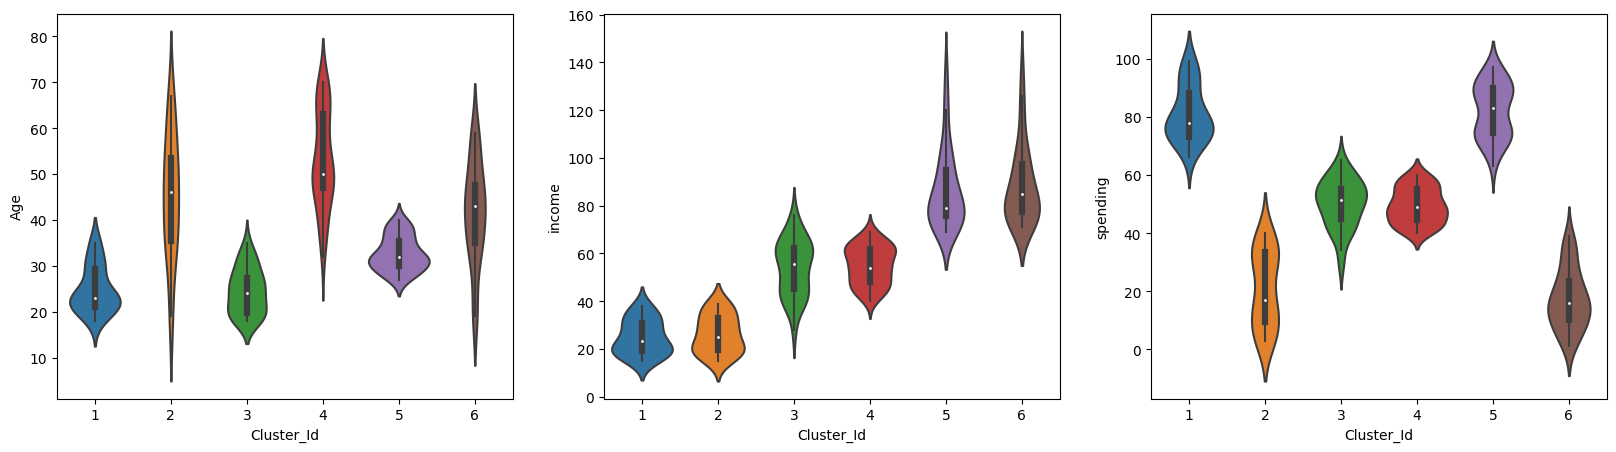

In [ ]:
#Violin plot

fig, axes = plt.subplots(1,3, figsize=(20,5))

sns.violinplot(x = 'Cluster_Id', y = 'Age', data = df2,ax=axes[0])
sns.violinplot(x = 'Cluster_Id', y = 'income', data = df2,ax=axes[1])
sns.violinplot(x = 'Cluster_Id', y = 'spending', data=df2,ax=axes[2])
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


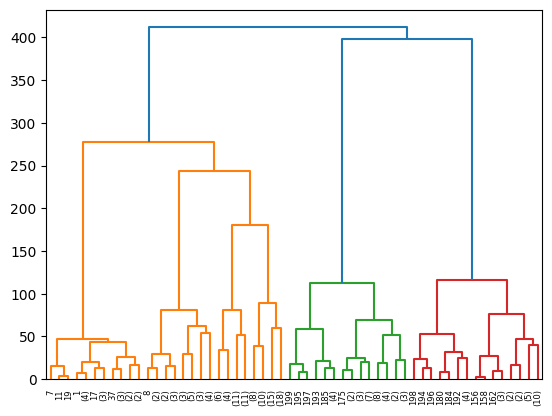

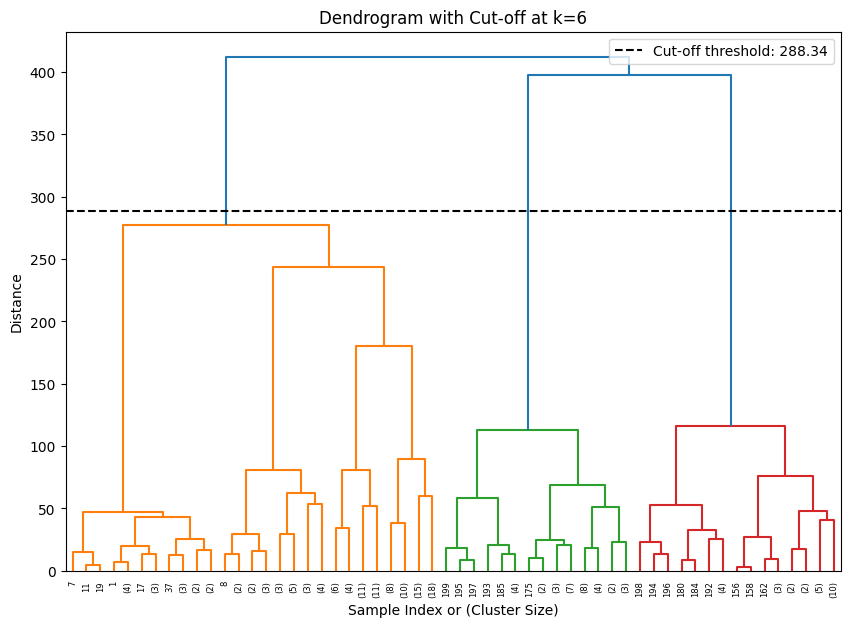

Cluster 1 size: 35
Cluster 2 size: 51
Cluster 3 size: 39
Cluster 4 size: 20
Cluster 5 size: 23
Cluster 6 size: 32


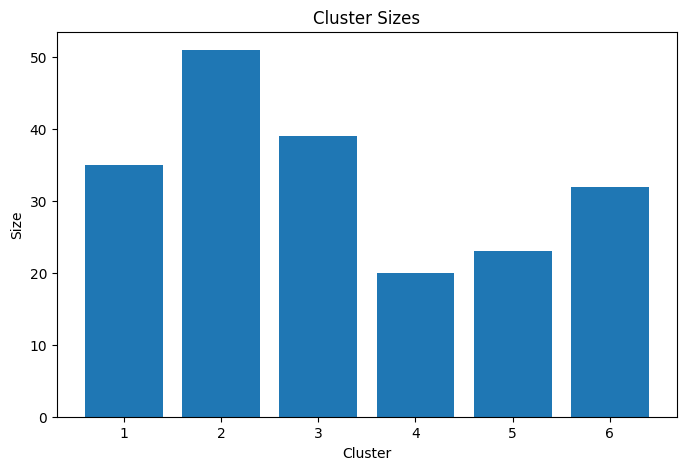

In [ ]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
import numpy as np
#Inisialisasi hierarchical clustering dengan metode Ward untuk k=6
num_clusters = 6
agglo_model = AgglomerativeClustering(n_clusters=num_clusters, affinity='euclidean', linkage='ward')
labels = agglo_model.fit_predict(y)

# Dapatkan informasi hirarki dari clustering
linkage_matrix = dendrogram(linkage(y, method='ward'), truncate_mode='level', p=num_clusters - 1)

# Tentukan nilai threshold untuk memotong dendrogram
threshold = np.max(linkage_matrix['dcoord']) * 0.7  # Ubah nilai threshold sesuai kebutuhan

# Tampilkan dendrogram dengan garis putus-putus pada tingkat k=6
plt.figure(figsize=(10, 7))
dendrogram(linkage(y, method='ward'), truncate_mode='level', p=num_clusters - 1)
plt.axhline(y=threshold, color='black', linestyle='--', label=f'Cut-off threshold: {threshold:.2f}')
plt.title(f'Dendrogram with Cut-off at k={num_clusters}')
plt.xlabel('Sample Index or (Cluster Size)')
plt.ylabel('Distance')
plt.legend()
plt.show()

#Menambahkan langkah-langkah untuk mendapatkan nilai-nilai dan ukuran klaster
cluster_sizes = []
for cluster in range(num_clusters):
    cluster_size = np.sum(labels == cluster)
    cluster_sizes.append(cluster_size)
    print(f"Cluster {cluster + 1} size: {cluster_size}")

# Menampilkan nilai-nilai dan ukuran klaster dalam grafik
plt.figure(figsize=(8, 5))
plt.bar(range(1, num_clusters + 1), cluster_sizes)
plt.title('Cluster Sizes')
plt.xlabel('Cluster')
plt.ylabel('Size')
plt.show()